In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append("../src")
sys.path.append("../")

import util
import infer

In [3]:
model_folder = Path("../output/0103_yolov5s_fold0/")

In [4]:
params_path = model_folder / "config" / "params.pkl"

In [5]:
params = util.load_pickle(params_path)

In [6]:
params

{'project': 'yolov5s',
 'exp_name': '0103_yolov5s_fold0',
 'fold': [0],
 'data_path': PosixPath('/home/vincent/Kaggle/data/tensorflow-great-barrier-reef'),
 'remove_nobbox': True,
 'seed': 2022,
 'hyp_name': 'Base',
 'batch': 16,
 'epochs': 20,
 'weights': 'yolov5s.pt',
 'workers': 10,
 'no_train': True,
 'repo': '/kaggle/input/yolov5-lib-ds',
 'conf': 0.15,
 'iou': 0.5,
 'augment': False,
 'img_size': 1280,
 'root_dir': PosixPath('/home/vincent/Kaggle/data/tensorflow-great-barrier-reef'),
 'label_dir': PosixPath('/home/vincent/Kaggle/data/tensorflow-great-barrier-reef/labels'),
 'ckpt_path': PosixPath('/home/vincent/Kaggle/Kaggle_TGBR/output/0103_yolov5s_fold0/yolov5s/0103_yolov5s_fold0/weights/best.pt'),
 'output_dir': PosixPath('/home/vincent/Kaggle/Kaggle_TGBR/output/0103_yolov5s_fold0'),
 'cfg_dir': PosixPath('/home/vincent/Kaggle/Kaggle_TGBR/output/0103_yolov5s_fold0/config'),
 'log_file': PosixPath('/home/vincent/Kaggle/Kaggle_TGBR/output/0103_yolov5s_fold0/log.txt'),
 'hyp_para

In [7]:
home_dir = Path("/home/vincent/Kaggle/Kaggle_TGBR/output/")
for key, val in params.items():
    if "path" in key or "dir" in key:
        old_val = val.resolve()
        if key not in ["data_path", "root_dir"]:
            new_val = home_dir / "/".join(str(old_val).split("/")[6:])
        else:
            new_val = Path("/home/vincent/Kaggle/data/tensorflow-great-barrier-reef")
        params[key] = new_val

In [8]:
params["repo"] = "./yolov5"
params["run_test"] = False

In [13]:
import pandas as pd
import numpy as np
import ast
df = pd.read_csv(params["root_dir"] / 'train.csv')
df = df.apply(lambda x: util.get_path(x, params), axis=1)
df['annotations'] = df['annotations'].apply(lambda x: ast.literal_eval(x))
df['num_bbox'] = df['annotations'].apply(lambda x: len(x))
util.seed_torch(params["seed"])    
colors = [(np.random.randint(255), np.random.randint(255), np.random.randint(255)) for idx in range(1)]    

   video_id  sequence  video_frame  sequence_frame image_id annotations  \
0         0     40258            0               0      0-0          []   
1         0     40258            1               1      0-1          []   
2         0     40258            2               2      0-2          []   
3         0     40258            3               3      0-3          []   
4         0     40258            4               4      0-4          []   

                                          image_path  \
0  /home/vincent/Kaggle/data/tensorflow-great-bar...   
1  /home/vincent/Kaggle/data/tensorflow-great-bar...   
2  /home/vincent/Kaggle/data/tensorflow-great-bar...   
3  /home/vincent/Kaggle/data/tensorflow-great-bar...   
4  /home/vincent/Kaggle/data/tensorflow-great-bar...   

                                          label_path  num_bbox  
0  /home/vincent/Kaggle/Kaggle_TGBR/output/labels...         0  
1  /home/vincent/Kaggle/Kaggle_TGBR/output/labels...         0  
2  /home/vincent/

In [16]:
df.head()["image_path"][0]

PosixPath('/home/vincent/Kaggle/data/tensorflow-great-barrier-reef/train_images/video_0/0.jpg')

Read Data


YOLOv5 🚀 v6.0-163-gd95978a torch 1.10.1+cu102 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11016MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


predict training data


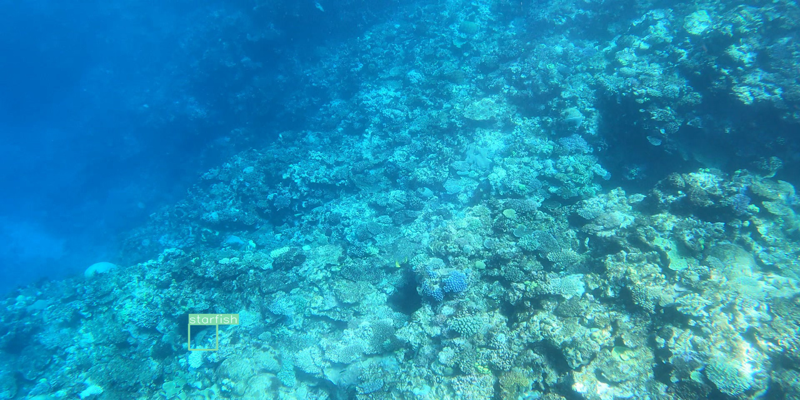

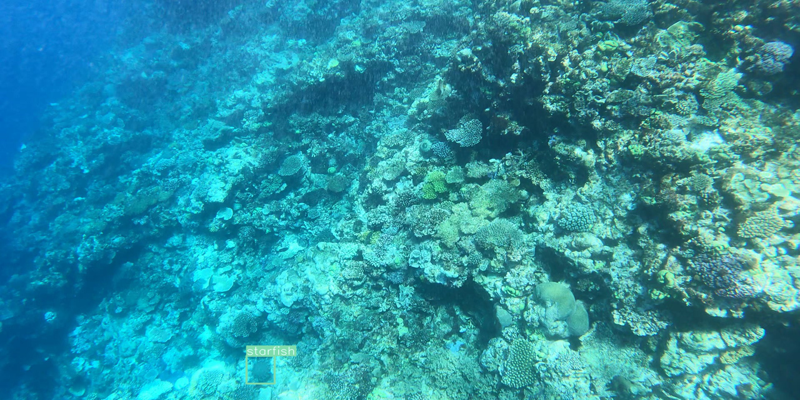

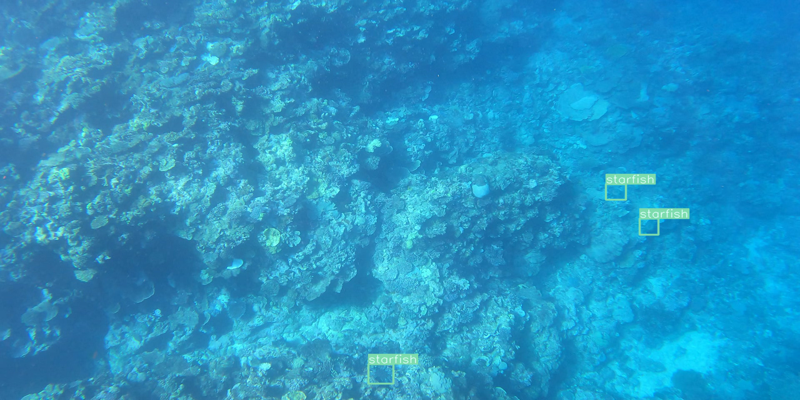

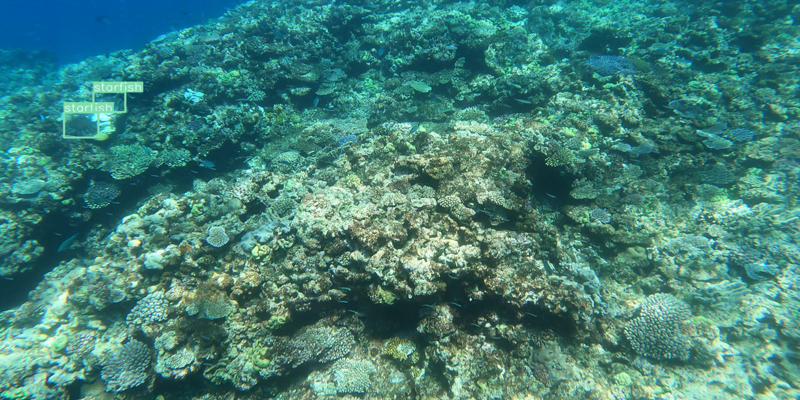

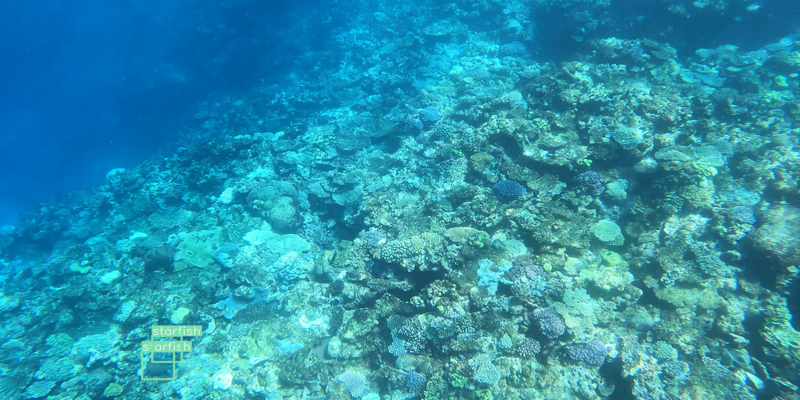

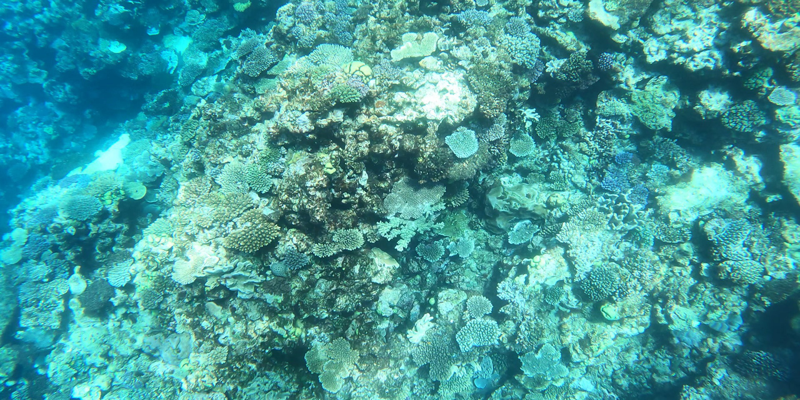

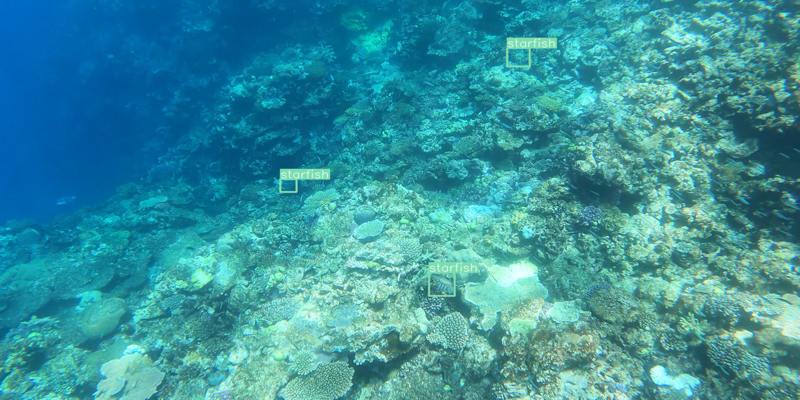

In [22]:
infer.run(params)